#### Import the libraries

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  # visualization

In [20]:
prod = pd.DataFrame({'Prod':['A']*3+['B']*3+['C']*3+['D']*3+['E']*3,
                     'Region':['Delhi','Mumbai','Chennai']*5,
     'Sales':np.random.randint(30000,80000,15),
     'Profit_Percent':np.random.randint(8,30,15)})

prod

,Prod,Region,Sales,Profit_Percent
0,A,Delhi,36925,15
1,A,Mumbai,42442,8
2,A,Chennai,74497,25
3,B,Delhi,78462,12
4,B,Mumbai,69387,23
5,B,Chennai,37257,14
6,C,Delhi,74854,11
7,C,Mumbai,50956,21
8,C,Chennai,62114,15
9,D,Delhi,76068,19


### 1) Filtering

#### Q1) Find the dataset for Delhi Region?

In [21]:
prod[prod['Region']=='Delhi']

,Prod,Region,Sales,Profit_Percent
0,A,Delhi,36925,15
3,B,Delhi,78462,12
6,C,Delhi,74854,11
9,D,Delhi,76068,19
12,E,Delhi,36429,9


#### Q2) Find the dataset for Mumbai Region where Sales > 50000?

In [22]:
prod[(prod['Region']=='Mumbai') & (prod['Sales']>50000)]

,Prod,Region,Sales,Profit_Percent
4,B,Mumbai,69387,23
7,C,Mumbai,50956,21


#### Q3) Filter the prod details where 
a) Region is either Chennai or Mumbai.<br>
b) Region is either Chennai or Mumbai and Sales > 60000.


In [26]:
# prod[(prod['Region']=='Chennai') | (prod['Region']=='Mumbai')]

# OR

prod[prod['Region'].isin(['Chennai','Mumbai'])]

,Prod,Region,Sales,Profit_Percent
1,A,Mumbai,42442,8
2,A,Chennai,74497,25
4,B,Mumbai,69387,23
5,B,Chennai,37257,14
7,C,Mumbai,50956,21
8,C,Chennai,62114,15
10,D,Mumbai,34082,18
11,D,Chennai,70387,14
13,E,Mumbai,31439,18
14,E,Chennai,67347,21


In [27]:
prod[(prod['Region'].isin(['Chennai','Mumbai'])) & (prod['Sales']>60000)]

,Prod,Region,Sales,Profit_Percent
2,A,Chennai,74497,25
4,B,Mumbai,69387,23
8,C,Chennai,62114,15
11,D,Chennai,70387,14
14,E,Chennai,67347,21


### Visualization

In [32]:
import matplotlib.pyplot as plt

#### 1) Display Sum of Sales for each region on Bar Chart

In [29]:
prod.head()

,Prod,Region,Sales,Profit_Percent
0,A,Delhi,36925,15
1,A,Mumbai,42442,8
2,A,Chennai,74497,25
3,B,Delhi,78462,12
4,B,Mumbai,69387,23


In [30]:
q1 = prod.groupby(['Region'])['Sales'].sum()
q1

Region
Chennai    311602
Delhi      302738
Mumbai     228306
Name: Sales, dtype: int32

In [31]:
print(q1.index)
print(q1.values)

Index(['Chennai', 'Delhi', 'Mumbai'], dtype='object', name='Region')
[311602 302738 228306]


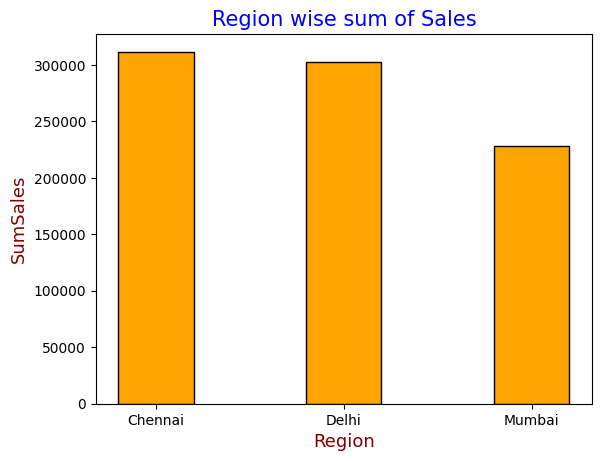

In [46]:
# plt.bar(x,y)
plt.bar(q1.index,q1.values,color='orange',width=0.4,edgecolor='black')
plt.xlabel('Region',color='maroon',size=13)
plt.ylabel('SumSales',color='maroon',size=13)
plt.title('Region wise sum of Sales',size=15,color='blue')
plt.show()

#### Horizontal Bar Chart

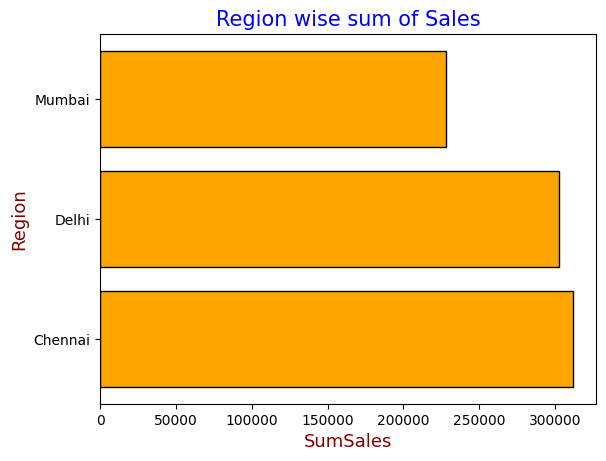

In [49]:
plt.barh(q1.index,q1.values,color='orange',edgecolor='black')
plt.ylabel('Region',color='maroon',size=13)
plt.xlabel('SumSales',color='maroon',size=13)
plt.title('Region wise sum of Sales',size=15,color='blue')
plt.show()

In [51]:
prod.columns

Index(['Prod', 'Region', 'Sales', 'Profit_Percent'], dtype='object')

#### 1) Display Sum of Sales and Avg profit for each Region on Bar Chart

In [68]:
a2 = prod.groupby(['Region']).agg({'Sales':'sum','Profit_Percent':'mean'})
a2

,Sales,Profit_Percent
Region,,
Chennai,311602,17.8
Delhi,302738,13.2
Mumbai,228306,17.6


In [69]:
a2['Sales(10K)'] = a2['Sales']/10000
a2

,Sales,Profit_Percent,Sales(10K)
Region,,,
Chennai,311602,17.8,31.1602
Delhi,302738,13.2,30.2738
Mumbai,228306,17.6,22.8306


In [56]:
print(a2.index)

Index(['Chennai', 'Delhi', 'Mumbai'], dtype='object', name='Region')


#### Stacked bar Chart

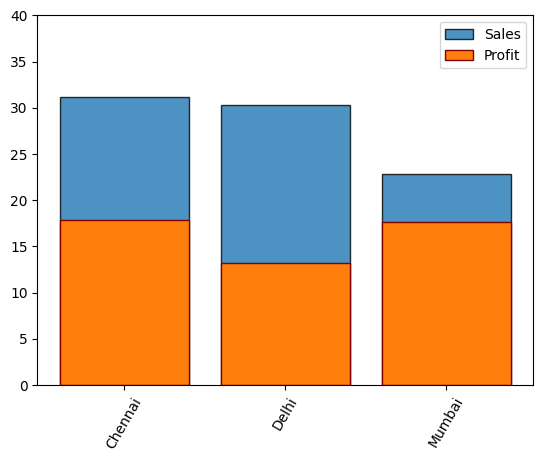

In [86]:
# alpha = transparency
plt.bar(a2.index,a2['Sales(10K)'],alpha=0.8,label='Sales',edgecolor='black')
plt.bar(a2.index,a2['Profit_Percent'],label='Profit',edgecolor='maroon')
plt.legend()
plt.xticks(rotation=60)
plt.ylim(0,40) #
plt.show()

In [76]:
a3 = a2[['Sales(10K)','Profit_Percent']]
a3

,Sales(10K),Profit_Percent
Region,,
Chennai,31.1602,17.8
Delhi,30.2738,13.2
Mumbai,22.8306,17.6


#### Pandas Plots

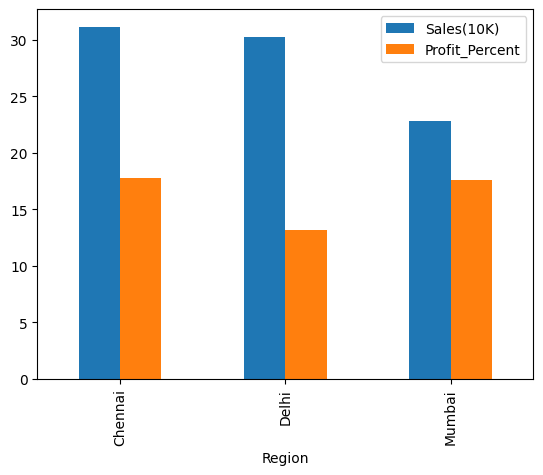

In [78]:
a3.plot(kind='bar')
plt.show()

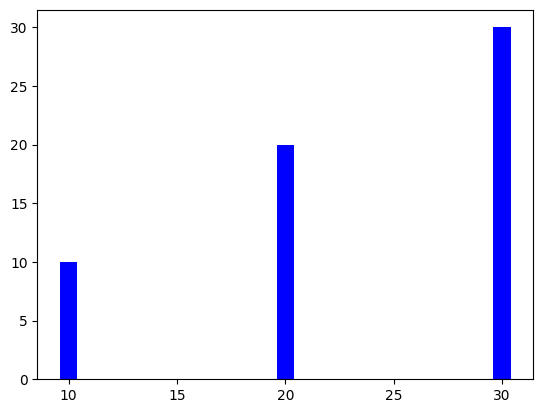

In [82]:
plt.bar([10,20,30],[10,20,30],color='orange',alpha=0.2)
plt.bar([10,20,30],[10,20,30],color='blue')
plt.show()

#### 2) Depict Prod wise Avg Sales of Line Chart

In [87]:
a2 = prod.groupby(['Prod'])['Sales'].mean()
a2

Prod
A    51288.000000
B    61702.000000
C    62641.333333
D    60179.000000
E    45071.666667
Name: Sales, dtype: float64

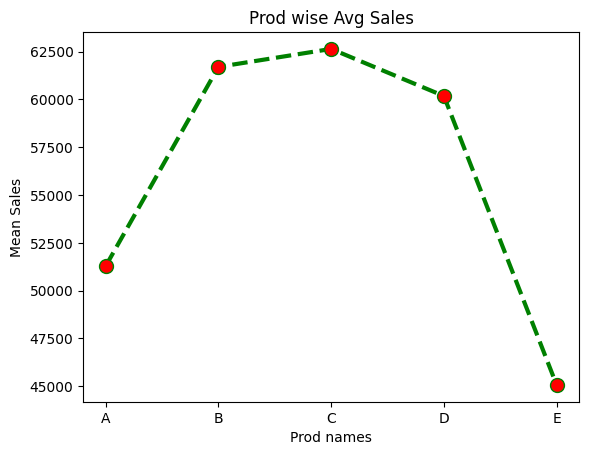

In [100]:
# marker = o,1,2,3,+,d,D,<,>,^,*
# lw = linewidth
# mfc = marker face color
# linestyle - dotted, dashed
plt.plot(a2.index,a2.values,marker='o',lw=3,markersize=10,mfc='red',linestyle='dashed',
         color='green')
plt.title('Prod wise Avg Sales')
plt.xlabel('Prod names')
plt.ylabel('Mean Sales')
plt.show()

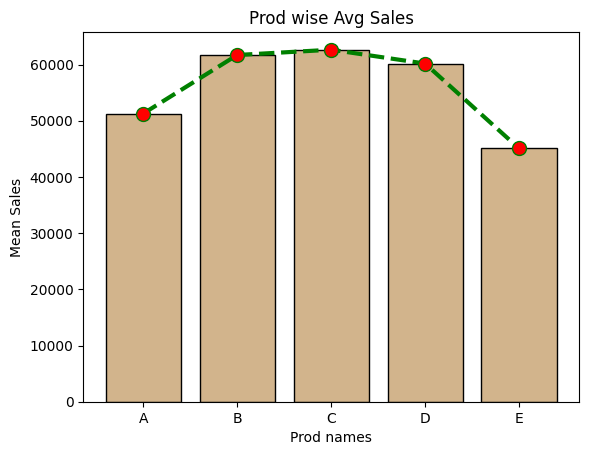

In [101]:
plt.bar(a2.index,a2.values,color='tan',edgecolor='black')
plt.plot(a2.index,a2.values,marker='o',lw=3,markersize=10,mfc='red',linestyle='dashed',
         color='green')
plt.title('Prod wise Avg Sales')
plt.xlabel('Prod names')
plt.ylabel('Mean Sales')
plt.show()

In [102]:
a2

Prod
A    51288.000000
B    61702.000000
C    62641.333333
D    60179.000000
E    45071.666667
Name: Sales, dtype: float64

In [103]:
a2.mean()  # Mean of Prod wise Avg Sales

56176.4

#### Depict prod wise mean sales where Prod with Sales < 56176.4 (red color) and Sales > 56176.4(Green color)

In [107]:
a2_high_avg = a2[a2.values> a2.mean()]
print(a2_high_avg)
a2_low_avg = a2[a2.values<= a2.mean()]
print(a2_low_avg)

Prod
B    61702.000000
C    62641.333333
D    60179.000000
Name: Sales, dtype: float64
Prod
A    51288.000000
E    45071.666667
Name: Sales, dtype: float64


In [ ]:
plt.bar(a2.index,a2.values,color='tan',edgecolor='black')

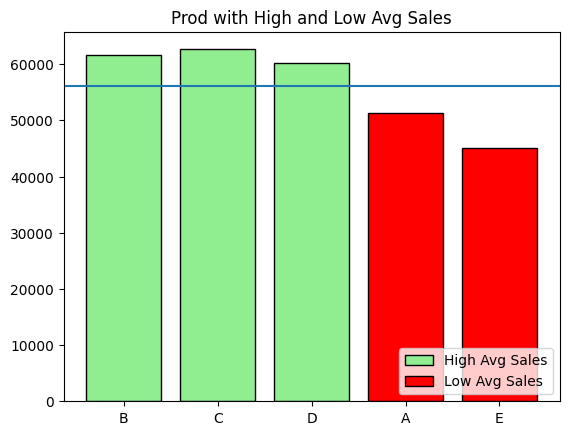

In [114]:
plt.bar(a2_high_avg.index,a2_high_avg.values,color='lightgreen',edgecolor='black',
        label='High Avg Sales')
plt.bar(a2_low_avg.index,a2_low_avg.values,color='red',
        edgecolor='black',label='Low Avg Sales')
plt.axhline(a2.mean())
plt.legend(loc=4)
plt.title('Prod with High and Low Avg Sales')
plt.show()

#### Q3) Find Prod wise Region with Max Sales

In [115]:
prod

,Prod,Region,Sales,Profit_Percent
0,A,Delhi,36925,15
1,A,Mumbai,42442,8
2,A,Chennai,74497,25
3,B,Delhi,78462,12
4,B,Mumbai,69387,23
5,B,Chennai,37257,14
6,C,Delhi,74854,11
7,C,Mumbai,50956,21
8,C,Chennai,62114,15
9,D,Delhi,76068,19


In [124]:
a4 = prod.groupby(['Prod'])['Sales'].max().reset_index()
a4

,Prod,Sales
0,A,74497
1,B,78462
2,C,74854
3,D,76068
4,E,67347


In [120]:
# Join = SQL,Pandas => inner, left, right, outer, self join

In [125]:
print(prod.columns)
print(a4.columns)

Index(['Prod', 'Region', 'Sales', 'Profit_Percent'], dtype='object')
Index(['Prod', 'Sales'], dtype='object')


In [132]:
# left table = a4, right_table=prod
res = pd.merge(a4,prod,left_on='Prod',right_on='Prod',how='left')
res

,Prod,Sales_x,Region,Sales_y,Profit_Percent
0,A,74497,Delhi,36925,15
1,A,74497,Mumbai,42442,8
2,A,74497,Chennai,74497,25
3,B,78462,Delhi,78462,12
4,B,78462,Mumbai,69387,23
5,B,78462,Chennai,37257,14
6,C,74854,Delhi,74854,11
7,C,74854,Mumbai,50956,21
8,C,74854,Chennai,62114,15
9,D,76068,Delhi,76068,19


In [137]:
r1 = res[res['Sales_x']==res['Sales_y']]
r1 = r1[['Prod','Region','Sales_x']]
r1.rename(columns={'Sales_x':'Max_Sales'},inplace=True)
r1

,Prod,Region,Max_Sales
2,A,Chennai,74497
3,B,Delhi,78462
6,C,Delhi,74854
9,D,Delhi,76068
14,E,Chennai,67347


In [138]:
a5 = prod.groupby(['Prod'])['Sales'].min().reset_index()
a5

,Prod,Sales
0,A,36925
1,B,37257
2,C,50956
3,D,34082
4,E,31439


In [141]:
res1 = pd.merge(a5,prod,left_on='Prod',right_on='Prod',how='left')
r2 = res1[res1['Sales_x']==res1['Sales_y']]
r2 = r2[['Prod','Region','Sales_x']]
r2.rename(columns={'Sales_x':'Min_Sales'},inplace=True)
r2

,Prod,Region,Min_Sales
0,A,Delhi,36925
5,B,Chennai,37257
7,C,Mumbai,50956
10,D,Mumbai,34082
13,E,Mumbai,31439


In [142]:
r1

,Prod,Region,Max_Sales
2,A,Chennai,74497
3,B,Delhi,78462
6,C,Delhi,74854
9,D,Delhi,76068
14,E,Chennai,67347


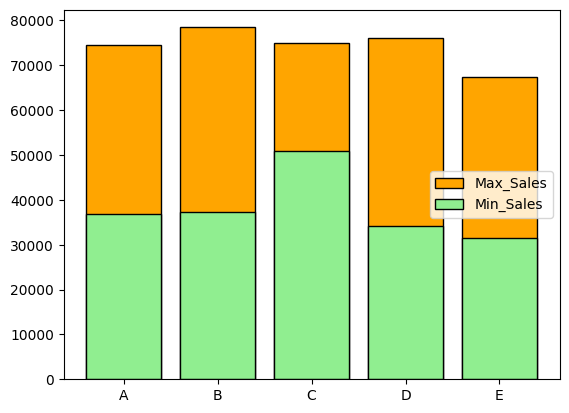

In [146]:
plt.bar(r1['Prod'],r1['Max_Sales'],color='orange',edgecolor='black',label='Max_Sales')
plt.bar(r2['Prod'],r2['Min_Sales'],color='lightgreen',edgecolor='black',label='Min_Sales')
plt.legend(loc=5)
plt.show()

#### Exercise

#### Q1) Find a way to display labels in Matplotlib on 
a) Simple Bar Chart<br>
b) Stacked Bar Chart<br>
c) Clustered Bar Chart

#### Q2) Find percentage contrubtion of each region Sales to Total Sales for that prod. Solve using a function where prod is passed as argument.


In [147]:
prod

,Prod,Region,Sales,Profit_Percent
0,A,Delhi,36925,15
1,A,Mumbai,42442,8
2,A,Chennai,74497,25
3,B,Delhi,78462,12
4,B,Mumbai,69387,23
5,B,Chennai,37257,14
6,C,Delhi,74854,11
7,C,Mumbai,50956,21
8,C,Chennai,62114,15
9,D,Delhi,76068,19


In [152]:
a6 = prod.groupby(['Prod'])['Sales'].sum().reset_index()
a6

,Prod,Sales
0,A,153864
1,B,185106
2,C,187924
3,D,180537
4,E,135215


In [154]:
36925+42442+74497

153864

In [156]:
print((36925/153864)*100)
print((42442/153864)*100)
print((74497/153864)*100)

23.998466177923362
27.58410024437165
48.41743357770499


In [ ]:
def region_wise_percent_contri(product):
    

In [ ]:
# Excel, SQL, Pandas, Python, ML, Chatgpt 

#### Scatter Chart